#### 4. As we demo the bidirectional effect in IMDB dataset (see code: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.3-advanced-usage-of-recurrent-neural-networks.ipynb)

Below is a code implementation of Bidirectional RNN on IMBD sentiment analysis task.


### Step 1: Import Necessary Packages, Load Dataset, and Process Data

In [54]:
# Import necessary packages
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words (among top max_features most common words)
maxlen = 500

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Reverse sequences
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print("Training data shape:", x_train.shape)
print("Training label shape:", y_train.shape)
print(" ")
print("Test data shape:",x_test.shape)
print("Test label shape:",y_test.shape)

Training data shape: (25000, 500)
Training label shape: (25000,)
 
Test data shape: (25000, 500)
Test label shape: (25000,)


Note: Bidirectional LSTM performs slightly better than regular LSTM. By performing some regularization technique to reduce chance of overfitting, as because bidirectional layer has twice more parameters than a chronological LSTM, bidirectional approach would likely be a stronger performer on this task.

I had tuned the Bidirection Model to slightly improve performance of the model by:
- Stacking two bidirectional layers (32 neurons each) and using LSTM instead of GRU cells.
    - Less neurons more layers better (go deep not fat).
- Lowered the number of epochs = 5
- Batch_size kept constant =  128
- Changed optimizer to Adam and learning rate to 1e-4

### Step 1: Import Necessary Packages 

In [55]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential
from keras.layers import SpatialDropout1D
from sklearn.metrics import roc_auc_score, roc_curve # new! import pandas as pd
import matplotlib.pyplot as plt # new!
%matplotlib inline

### Step 2: Create, Compile, Fit, and Train Model

In [56]:
from keras.layers import LSTM
from keras.layers.wrappers import Bidirectional
# LSTM layer architecture
model = Sequential()
model.add(layers.Embedding(max_features, 32))
#model.add(layers.SpatialDropout1D(drop_embed))
model.add(layers.Bidirectional(LSTM(32, return_sequences=True))) 
model.add(layers.Bidirectional(LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

# Training:
from tensorflow import keras
epochs = 5
batch_size = 128
opt = keras.optimizers.Adam(1e-4) # 

model.compile(loss='binary_crossentropy', optimizer= opt ,metrics=['accuracy'])
history = model.fit(x_train, y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/5
196/196 [==============================] - 23s 117ms/step - loss: 0.6903 - accuracy: 0.5412 - val_loss: 0.6463 - val_accuracy: 0.6581
Epoch 2/5
196/196 [==============================] - 22s 111ms/step - loss: 0.4428 - accuracy: 0.8051 - val_loss: 0.3679 - val_accuracy: 0.8482
Epoch 3/5
196/196 [==============================] - 22s 110ms/step - loss: 0.3047 - accuracy: 0.8857 - val_loss: 0.3258 - val_accuracy: 0.8680
Epoch 4/5
196/196 [==============================] - 21s 110ms/step - loss: 0.2440 - accuracy: 0.9140 - val_loss: 0.3092 - val_accuracy: 0.8748
Epoch 5/5
196/196 [==============================] - 22s 110ms/step - loss: 0.2064 - accuracy: 0.9321 - val_loss: 0.3310 - val_accuracy: 0.8772


### Step 3: Evaluate Model Performance

In [59]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("---------------------------------------------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))
print("---------------------------------------------------------------------------------")
y_hat = model.predict(x_test)
pct_auc = roc_auc_score(y_test, y_hat)*100.0
print("ROC AUC Score {:0.2f}".format(pct_auc))
print("---------------------------------------------------------------------------------")
test_loss, test_acc = model.evaluate(x_test,y_test,batch_size=batch_size) 
# since validation and test data are same in this case
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

Training: accuracy = 0.948560  ;  loss = 0.172415
---------------------------------------------------------------------------------
Validation: accuracy = 0.877200  ;  loss = 0.331035
---------------------------------------------------------------------------------
ROC AUC Score 94.55
---------------------------------------------------------------------------------
196/196 [==============================] - 7s 36ms/step - loss: 0.3310 - accuracy: 0.8772
Test Loss: 0.33103492856025696
Test Accuracy: 0.8772000074386597


### Step 4: Plot Learning Curves

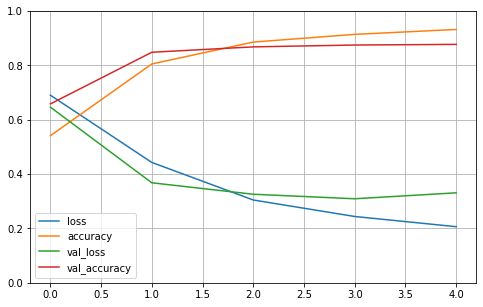

In [60]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set vertical range to [0,-1]
plt.show() 

In conclusion, it looks like just using an bidirectional LSTM is too simple of a model to be able to achieve anything higher than 88% accuracy. For instance, using pretrained model, such as BERT implementation in keras, has been able to able to get ~99% acc on IMBD classification (https://stackoverflow.com/questions/57422321/how-to-get-90-test-accuracy-on-imdb-data).